<a href="https://colab.research.google.com/github/MarshallPotts/CSE450-Machine-Learning/blob/main/Case_study_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
!pip install scikit-learn==1.5.2
import seaborn as sb
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_log_error
from sklearn.metrics import r2_score

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 44.9 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1


In [ ]:
property_data = pd.read_csv("https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/housing.csv")
property_data.head(100)

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,1565930130,20141104T000000,4,3.25,3760,4675,2.0,0,0,3,...,2740,1020,2007,0,98038,47.3862,-122.048,3280,4033,429900.0
1,3279000420,20150115T000000,3,1.75,1460,7800,1.0,0,0,2,...,1040,420,1979,0,98023,47.3035,-122.382,1310,7865,233000.0
2,194000575,20141014T000000,4,1.00,1340,5800,1.5,0,2,3,...,1340,0,1914,0,98116,47.5658,-122.389,1900,5800,455000.0
3,2115510160,20141208T000000,3,1.75,1440,8050,1.0,0,0,3,...,1440,0,1985,0,98023,47.3187,-122.390,1790,7488,258950.0
4,7522500005,20140815T000000,2,1.50,1780,4750,1.0,0,0,4,...,1080,700,1947,0,98117,47.6859,-122.395,1690,5962,555000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,6132600655,20141016T000000,3,2.25,2890,5000,3.0,0,0,3,...,2890,0,2014,0,98117,47.6983,-122.389,2020,5000,930000.0
96,1068000255,20140827T000000,4,3.50,4285,9567,2.0,0,1,5,...,3485,800,1946,0,98199,47.6434,-122.409,2960,6902,1650000.0
97,3052700921,20150211T000000,6,3.00,2620,4350,1.0,0,0,3,...,1760,860,1957,0,98117,47.6780,-122.373,1760,4300,900000.0
98,3024089057,20150106T000000,4,1.00,1170,34925,1.0,0,0,4,...,1170,0,1942,0,98065,47.5305,-121.841,1610,28108,282500.0


In [ ]:
property_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             20000 non-null  int64  
 1   date           20000 non-null  object 
 2   bedrooms       20000 non-null  int64  
 3   bathrooms      20000 non-null  float64
 4   sqft_living    20000 non-null  int64  
 5   sqft_lot       20000 non-null  int64  
 6   floors         20000 non-null  float64
 7   waterfront     20000 non-null  int64  
 8   view           20000 non-null  int64  
 9   condition      20000 non-null  int64  
 10  grade          20000 non-null  int64  
 11  sqft_above     20000 non-null  int64  
 12  sqft_basement  20000 non-null  int64  
 13  yr_built       20000 non-null  int64  
 14  yr_renovated   20000 non-null  int64  
 15  zipcode        20000 non-null  int64  
 16  lat            20000 non-null  float64
 17  long           20000 non-null  float64
 18  sqft_l

<Axes: xlabel='sqft_living', ylabel='sqft_lot'>

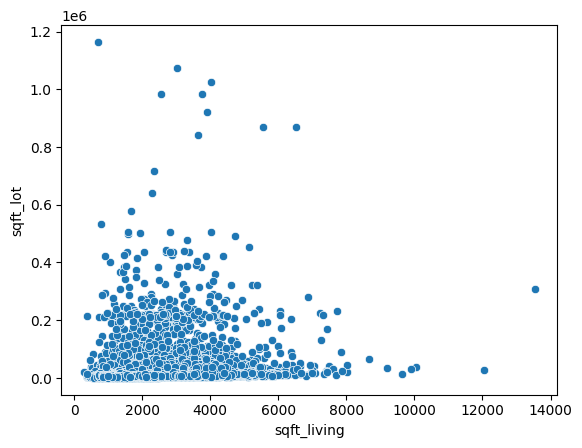

In [ ]:
sb.scatterplot(data=property_data, x=property_data["sqft_living"], y=property_data["sqft_lot"])


In [ ]:
#notice the linear looking grouping around 0 sqft_lot from 0-8000 sqft_living

lot_range = property_data["sqft_lot"].max() - property_data["sqft_lot"].min()
print("lot_range in sqft:", lot_range)

#add feature of acres in each lot
property_data["lot_acres"] = property_data["sqft_lot"] / 43560    #1 acre = 43560sqft
property_data["lot_acres"].describe()
#property_data["lot_acres"].head(20)


lot_range in sqft: 1164274


,lot_acres
count,20000.000000
mean,0.344705
std,0.911418
min,0.011938
25%,0.115702
50%,0.174931
75%,0.245868
max,26.739991


Is there a reason the sqft of the lots is so low? Is there a large difference between the cost of apartments and houses for the same sqft? How do I determine which ones are apartments? number of floors? what about town homes? lot size? Again what about town homes? No basement? How common are multilevel apartments in a large apartment building?

In [ ]:
#find the range of years of these records to figure out any data to add by that time range.
property_data["year"] = property_data["date"].astype(str).str[:4]
property_data["year"] = property_data["year"].astype(int)
year_range = property_data["year"].max() - property_data["year"].min()
year_max = property_data["year"].max()
year_min = property_data["year"].min()
print("year_range: ", year_range)
print("year_max: ", year_max)
print("year_min: ", year_min)


year_range:  1
year_max:  2015
year_min:  2014


<Axes: xlabel='sqft_lot', ylabel='sqft_basement'>

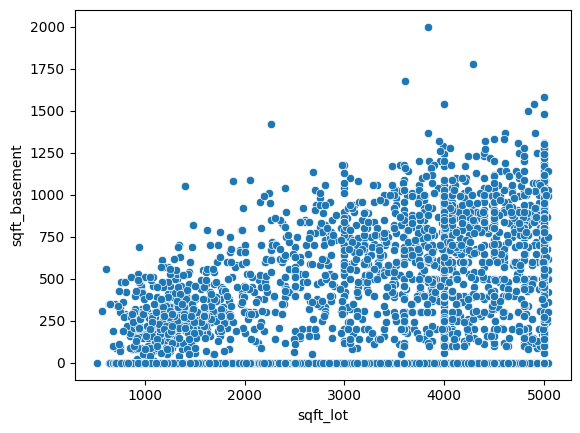

In [ ]:
#graph the sqft_lots below 25%
q1 = property_data["sqft_lot"].quantile(0.25)
filtered_property = property_data[property_data["sqft_lot"] <= q1]
sb.scatterplot(data=filtered_property, x=filtered_property["sqft_lot"], y=filtered_property["sqft_basement"])

In [ ]:
#add apartment column need to ad something to filter out houses that don't have
property_data["apartment"] = (property_data["sqft_basement"] == 0).astype(int)
property_data["apartment"].head(20)

,apartment
0,0
1,0
2,1
3,1
4,0
5,0
6,1
7,1
8,1
9,1
